<a href="https://colab.research.google.com/github/Patelriki28/RP-Websoft/blob/master/Exploratory_car_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratoray data analysis of car feauters** 

**1.Import the required library for EDA**

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline   
plt.rcParams["figure.figsize"] = (10,6)  

**1.1 Load the dataset in the Colab**

In [26]:
from google.colab import files
uploaded = files.upload() 


Saving data.csv to data (1).csv


**1.2 Loading the data into the data frame**

In [28]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [43]:
# To display the top 10 rows 
df.head(10)      

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [42]:
 # To display the botton 10 rows
df.tail(10)                       

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,394.0,8.0,MANUAL,rear wheel drive,Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,394.0,8.0,MANUAL,rear wheel drive,Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,221.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,26,17,61,28995


**1.3 Checking the types of data and basic summary stats**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 66 to 11909
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           2748 non-null   object
 1   Model          2748 non-null   object
 2   Year           2748 non-null   int64 
 3   Transmission   2748 non-null   object
 4   Drive Mode     2748 non-null   object
 5   Vehicle Size   2748 non-null   object
 6   Vehicle Style  2748 non-null   object
 7   Popularity     2748 non-null   int64 
 8   Price          2748 non-null   int64 
 9   price_group    2748 non-null   object
dtypes: int64(3), object(7)
memory usage: 236.2+ KB


In [123]:
df.describe()

,Year,Popularity,Price
count,2748.000000,2748.000000,2748.000000
mean,2013.971252,1142.462154,32862.209607
std,2.824095,710.820507,7202.295591
min,2008.000000,21.000000,15349.000000
25%,2012.000000,481.000000,27243.750000
50%,2015.000000,1013.000000,33000.000000
75%,2016.000000,1851.000000,38500.000000
max,2017.000000,2202.000000,46250.000000


**2. Dropping irrelevant columns**

In [127]:
df = df.drop(['Year'], axis=1)
df.head(5)

,Make,Model,Transmission,Drive Mode,Vehicle Size,Vehicle Style,Popularity,Price,price_group
66,Chrysler,200,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29370,20-39K
69,Chrysler,200,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,30825,20-39K
72,Chrysler,200,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,31785,20-39K
73,Chrysler,200,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29905,20-39K
78,Chrysler,200,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29905,20-39K


**3. Renaming the columns**

In [119]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(10)

,Make,Model,Year,Transmission,Drive Mode,Vehicle Size,Vehicle Style,Popularity,Price,price_group
66,Chrysler,200,2015,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29370,20-39K
69,Chrysler,200,2015,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,30825,20-39K
72,Chrysler,200,2016,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,31785,20-39K
73,Chrysler,200,2016,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29905,20-39K
78,Chrysler,200,2017,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,29905,20-39K
79,Chrysler,200,2017,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,31785,20-39K
83,Chrysler,200,2017,AUTOMATIC,all wheel drive,Midsize,Sedan,1013,30900,20-39K
203,Chrysler,300,2015,AUTOMATIC,all wheel drive,Large,Sedan,1013,37570,20-39K
204,Chrysler,300,2015,AUTOMATIC,rear wheel drive,Large,Sedan,1013,31695,20-39K
205,Chrysler,300,2015,AUTOMATIC,rear wheel drive,Large,Sedan,1013,38070,20-39K


**4. Dropping the duplicate rows**

In [55]:
df.shape

(11914, 13)

In [56]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


In [57]:
df = df.drop_duplicates()
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [58]:
df.shape

(11122, 13)

**4.1 Dropping the missing or null values**

In [59]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [61]:
df = df.dropna()
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [62]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


**5. Detecting Outliers**

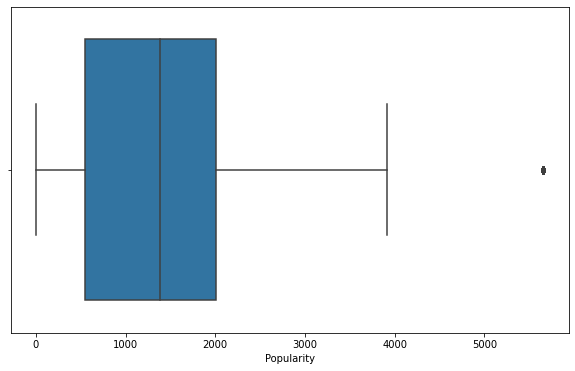

In [63]:
sns.boxplot(x=df['Popularity'])

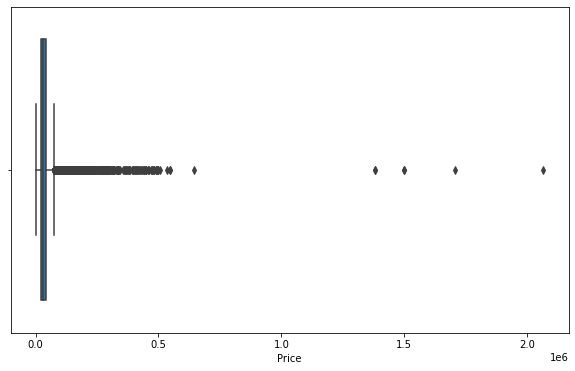

In [64]:
sns.boxplot(x=df['Price'])

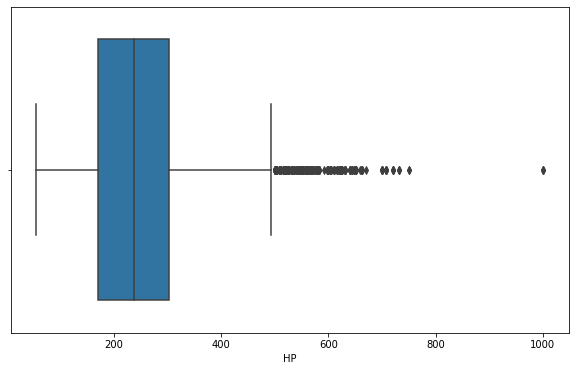

In [67]:
sns.boxplot(x=df['HP'])

In [75]:
Q1 = df.quantile(0.40)
Q3 = df.quantile(0.60)
IQR = Q3 - Q1
print(IQR)

Year             3.0
HP              67.0
Cylinders        1.0
MPG-H            3.0
MPG-C            2.0
Popularity     754.0
Price         7798.0
dtype: float64


In [76]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2748, 13)

**6. What are the most represented car brands ?**

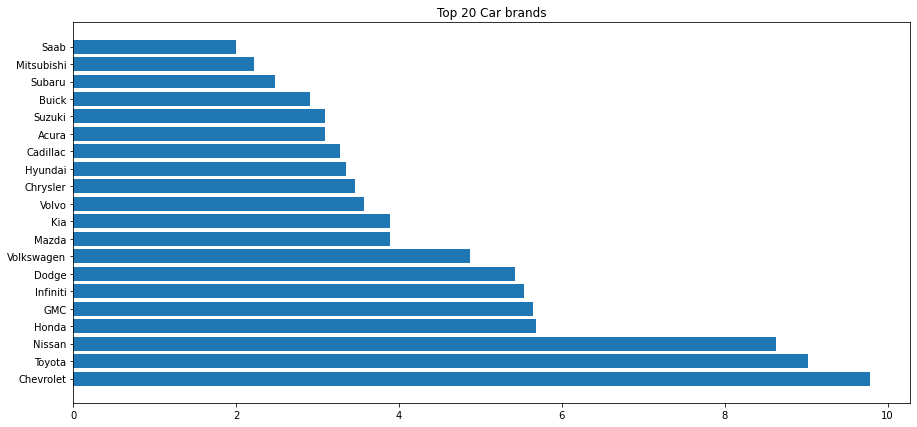

In [82]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 20 car brands
popular_labels = counts.index[:20]
    
plt.figure(figsize=(15,7))
plt.barh(popular_labels, width=counts[:20])
plt.title('Top 20 Car brands')
plt.show()

In [83]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Dodge')|
               (df['Make'] == 'Kia')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volvo')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'Hyundai')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Chrysler')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chrysler    32243.473684
Dodge       28124.530201
Honda       32653.685897
Hyundai     31047.826087
Kia         30074.485981
Nissan      32692.974684
Toyota      32964.979839
Volkswagen  30703.507463
Volvo       39046.785714


**7.Correlation matrix**

In [84]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.286152,0.048619,0.132518,0.208517,0.204413,0.344289
HP,0.286152,1.000000,0.718165,-0.241448,-0.452178,0.071184,0.660603
Cylinders,0.048619,0.718165,1.000000,-0.441869,-0.638397,0.222803,0.391264
MPG-H,0.132518,-0.241448,-0.441869,1.000000,0.841829,-0.184752,-0.033464
MPG-C,0.208517,-0.452178,-0.638397,0.841829,1.000000,-0.122596,-0.152899
Popularity,0.204413,0.071184,0.222803,-0.184752,-0.122596,1.000000,-0.107259
Price,0.344289,0.660603,0.391264,-0.033464,-0.152899,-0.107259,1.000000


**High Correlation between**


1.Cylinders & HP

2.highway mpg & City mpg

**High anticorrelation**




1.Cylinders & highway mpg

**8.Exploratory Data Analysis**

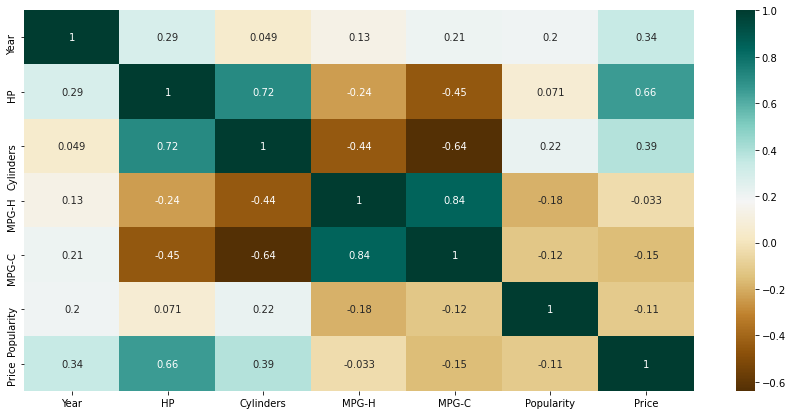

In [86]:
plt.figure(figsize=(15,7))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**Scatterplot**

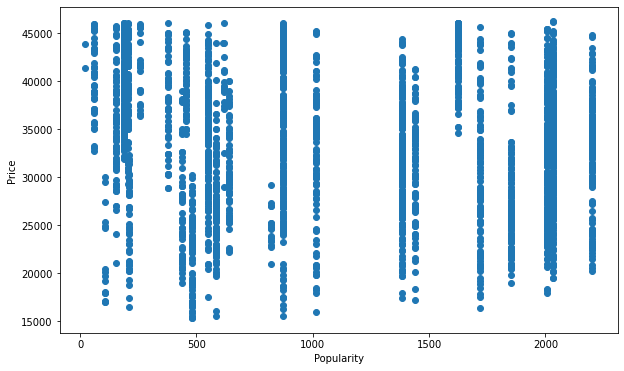

In [87]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Popularity'], df['Price'])
ax.set_xlabel('Popularity')
ax.set_ylabel('Price')
plt.show()

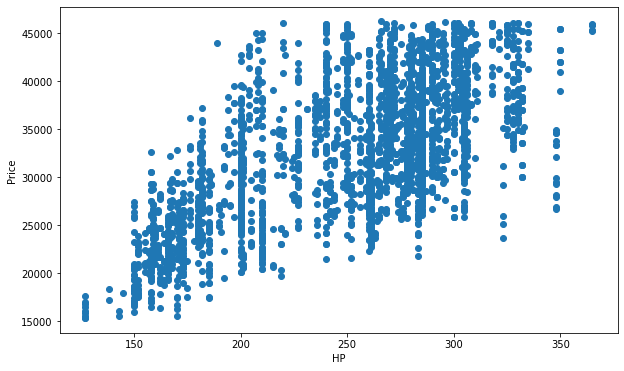

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

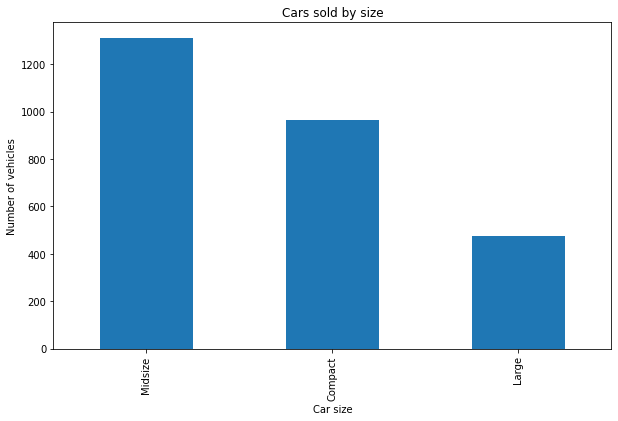

In [90]:
df['Vehicle Size'].value_counts().plot.bar(figsize=(10,6))                   
plt.title("Cars sold by size")
plt.ylabel('Number of vehicles')
plt.xlabel('Car size');

Text(0.5, 0, 'Count of vehicles')

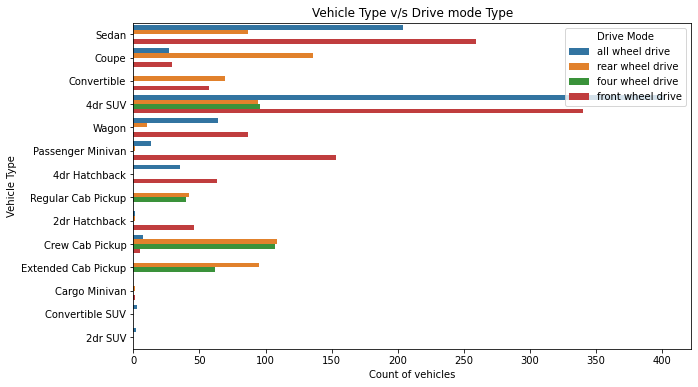

In [91]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')


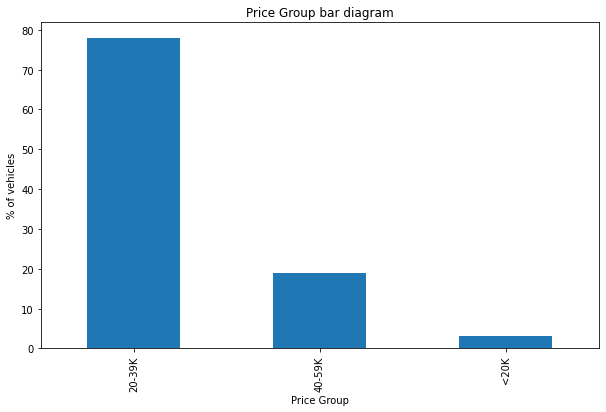

In [92]:
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

**9.Build Machine Learning Model**

In [93]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

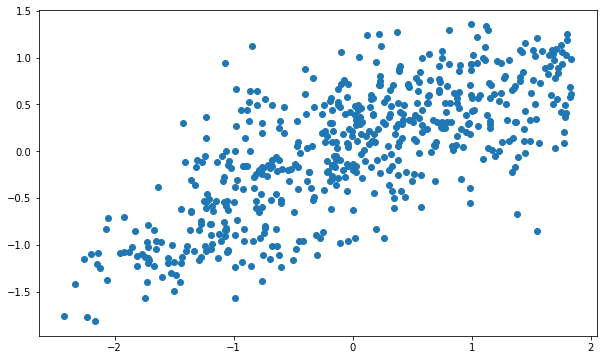

In [98]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

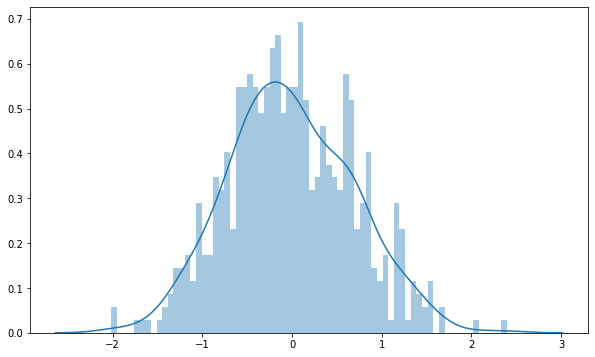

In [99]:
sns.distplot((y_test-y_pred),bins=70)

In [100]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.5573102624026788
Root Mean Squared Error: 0.6925328108907612
R2 Score: 0.5346254889531904
